In [1]:
import pandas as pd
import numpy as np

In [2]:
test = pd.read_csv("Data/test.csv")
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [3]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [4]:
title = []
title_group = ["Mr", "Miss", "Mrs", "Master"]
title_fix = []

for i in test.Name:
    title.append(i)
    
for j in title:
    splitting = j.split(",")[1].split(".")[0].lstrip()
    if splitting in title_group:
        title_fix.append(splitting)
    else:
        title_fix.append("Others")

In [5]:
test["Title"] = title_fix
test['Title'] = test['Title'].map({"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Others": 5})

In [6]:
kelas = []

for i in test.Fare:
    if i <= 7.91:
        kelas.append(4)
    elif i > 7.91 and i <= 14.454:
        kelas.append(3)
    elif i > 14.454 and i <= 31:
        kelas.append(2)
    else:
        kelas.append(1)

        
test.Fare = kelas

In [7]:
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values="NaN", strategy="mean", axis=0)

test.iloc[:, 4:5] = imputer.fit_transform(test.iloc[:, 4:5])

C:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [8]:
age = []

for i in test.Age:
    if i <= 16:
        age.append(0)
    elif i > 16 and i <= 32:
        age.append(1)
    elif i > 32 and i <= 48:
        age.append(2)
    elif i > 48 and i <= 64:
        age.append(3)
    else:
        age.append(4)

        
test.Age = age

In [9]:
test.Sex = test.Sex.map({"male":1, "female":0})

In [10]:
test["Alone"] = (test.SibSp == 0) & (test.Parch == 0)
test.Alone = test.Alone.astype(int)

In [11]:
test.Embarked = test.Embarked.map({'S':0, 'C':1, 'Q':2})

In [12]:
test.drop(columns=["PassengerId", "Name", "SibSp", "Parch", "Ticket", "Cabin"], inplace=True)

In [13]:
test

,Pclass,Sex,Age,Fare,Embarked,Title,Alone
0,3,1,2,4,2,1,1
1,3,0,2,4,0,3,0
2,2,1,3,3,2,1,1
3,3,1,1,3,0,1,1
4,3,0,1,3,0,3,0
...,...,...,...,...,...,...,...
413,3,1,1,3,0,1,1
414,1,0,2,1,1,5,1
415,3,1,2,4,0,1,1
416,3,1,1,3,0,1,1


In [14]:
from jcopml.utils import load_model

pac = load_model("model/Titanic_model_PAC.h5")
knn = load_model("model/Titanic_model_KNN.h5")
svm = load_model("model/Titanic_model_SVM.h5")
lr = load_model("model/Titanic_model_LR.h5")
rf = load_model("model/Titanic_model_RF.h5")
dt = load_model("model/Titanic_model_DT.h5")

In [15]:
gender = pd.read_csv("Data/gender_submission.csv")
gender

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [16]:
y_test = gender.Survived

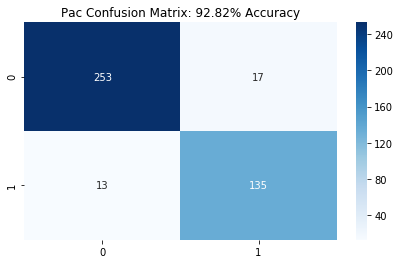

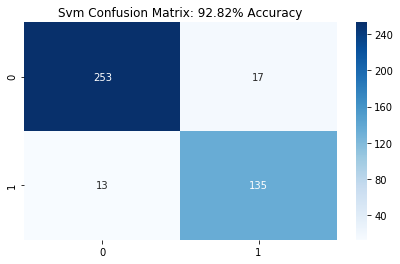

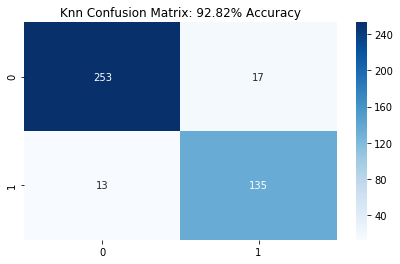

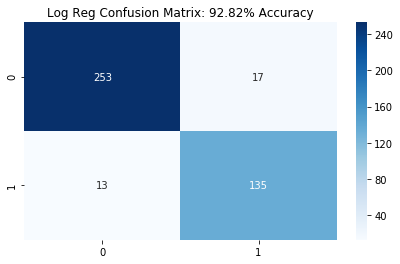

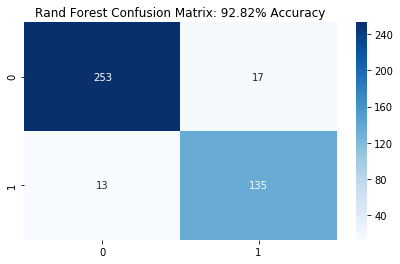

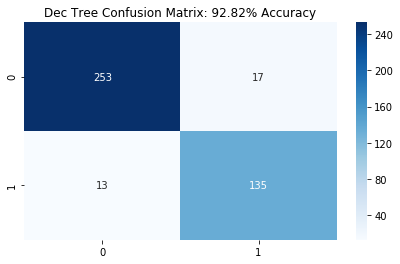

In [19]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

nama_clasifier = ["Pac", "Svm", "Knn", "Log Reg", "Rand Forest", "Dec Tree"]
models = [pac, svm, knn, lr, rf, dt]
akurasi = []
index = 0

for model in models:
    y_pred = model.predict(test)
    acc = accuracy_score(y_pred, y_test)
    cm = confusion_matrix(y_pred, y_test)
    
    # jika confusion matrix tidak keluar coba code figure di comment
    plt.figure(figsize=(7,4))
    plt.title(f"{nama_clasifier[index]} Confusion Matrix: {round(acc*100,2)}% Accuracy")
    # fmt untuk agar output angka nya tidak aneh 
    sns.heatmap(cm, cmap="Blues", annot=True, fmt='g')
    plt.show()
    
    akurasi.append(acc)
    index += 1